In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [3]:
# %%
energy = pd.read_csv('../../../data/energy/BP_statistical_report_global_energy_usage/processed/BP_global_energy_usage_by_type.csv')

# Tidy and group
energy.loc[energy['type'].isin(['Geothermal/Biomass/Other', 'Biodiesel/Biogasoline', 'Solar', 'Wind']), 'type'] = 'renew'
energy.loc[energy['type'].isin(['Hydroelectric']), 'type'] = 'hydro'
merged = energy.merge(total_pop, on='year')
merged.fillna(value=0, inplace=True)
merged = merged.groupby(['type', 'year', 'pop_bil'])['consumption_TW'].sum().reset_index()

In [4]:
decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
coal_decades = np.zeros(6)
ff_decades = np.zeros(6)
gas_decades = np.zeros(6)
oil_decades = np.zeros(6)
nuclear_decades = np.zeros(6)
hydro_decades = np.zeros(6)
renew_decades = np.zeros(6)

for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = df_decade[df_decade['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    coal_decade = df_decade[df_decade['type']=='Coal']['consumption_TW'].mean() / pop_decade
    ff_decade = df_decade[df_decade['type']=='Fossil Fuels']['consumption_TW'].mean() / pop_decade
    gas_decade = df_decade[df_decade['type']=='Natural Gas']['consumption_TW'].mean() / pop_decade
    oil_decade = df_decade[df_decade['type']=='Oil']['consumption_TW'].mean() / pop_decade
    nuclear_decade = df_decade[df_decade['type']=='Nuclear']['consumption_TW'].mean() / pop_decade
    hydro_decade = df_decade[df_decade['type']=='hydro']['consumption_TW'].mean() / pop_decade
    renew_decade = df_decade[df_decade['type']=='renew']['consumption_TW'].mean() / pop_decade
    
    
    coal_decades[i] = coal_decade
    ff_decades[i] = ff_decade
    gas_decades[i] = gas_decade
    oil_decades[i] = oil_decade
    nuclear_decades[i] = nuclear_decade
    hydro_decades[i] = hydro_decade
    renew_decades[i] = renew_decade

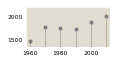

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [W]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(ff_decades)*0.9*1e3,np.max(ff_decades)*1.1*1e3))

ax.plot(decades[0:-1], ff_decades*1e3, 'o', ms=3, color='grey')
ax.vlines(decades[0:-1], 0, ff_decades*1e3, lw=0.5, color='grey')


plt.savefig('../../../figures/database_paper/power_ff_decades.svg')

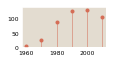

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [W]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((0, np.max(nuclear_decades)*1.1*1e3))

ax.plot(decades[0:-1], nuclear_decades*1e3, 'o', ms=3, color=colors['red'])
ax.vlines(decades[0:-1], 0, nuclear_decades*1e3, lw=0.5, color=colors['red'])

plt.savefig('../../../figures/database_paper/power_nuclear_decades.svg')

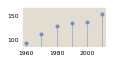

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('power consumption per capita [W]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(hydro_decades)*0.9*1e3, np.max(hydro_decades)*1.1*1e3))

ax.plot(decades[0:-1], hydro_decades*1e3, 'o', ms=3, color=colors['blue'])
ax.vlines(decades[0:-1], 0, hydro_decades*1e3, lw=0.5, color=colors['blue'])

plt.savefig('../../../figures/database_paper/power_hydro_decades.svg')

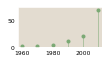

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [W]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim(0, np.max(renew_decades)*1.1*1e3)

ax.plot(decades[0:-1], renew_decades*1e3, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, renew_decades*1e3, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/power_renew_decades.svg')

In [69]:
energy.head()

,Unnamed: 0,year,type,consumption_EJ_yr,consumption_TW
0,0,1991,renew,0.01,0.000160
1,1,1993,renew,0.01,0.000177
2,2,1994,renew,0.01,0.000190
3,3,1995,renew,0.01,0.000203
4,4,1996,renew,0.01,0.000224


In [70]:
energy['type'].unique()

array(['renew', 'Coal', 'hydro', 'Oil', 'Natural Gas', 'Nuclear',
       'Fossil Fuels'], dtype=object)

In [7]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"